In [73]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("denkuznetz/taxi-price-prediction")

print("Path to dataset files:", path)

# obtain the names of the files in the downloaded folder
files = os.listdir(path)
print("Files in dataset:", files)

Path to dataset files: /Users/francescavasta/.cache/kagglehub/datasets/denkuznetz/taxi-price-prediction/versions/1
Files in dataset: ['taxi_trip_pricing.csv']


In [74]:
import pandas as pd

df_taxi = pd.read_csv("/Users/francescavasta/.cache/kagglehub/datasets/denkuznetz/taxi-price-prediction/versions/1/taxi_trip_pricing.csv")
df_taxi.head()


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [75]:
print(df_taxi.shape)
df_taxi.info()

(1000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [76]:
df_taxi.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [77]:
#df_taxi.var()

# Choose only numeric
numeric_df = df_taxi.select_dtypes(include=['float64'])
print(numeric_df.var())

Trip_Distance_km          396.220960
Passenger_Count             1.214953
Base_Fare                   0.757182
Per_Km_Rate                 0.184742
Per_Minute_Rate             0.013361
Trip_Duration_Minutes    1033.905855
Trip_Price               1637.803947
dtype: float64


In [78]:
# Count NaN for each row
na_counts = df_taxi.isna().sum(axis=1)

# Count the distirbution of rows with specific values of NaN
distribution = na_counts.value_counts().sort_index()

# show
print(distribution)

0    562
1    341
2     83
3     14
Name: count, dtype: int64


In [79]:
df_taxi= df_taxi.dropna(axis=0, thresh=9)

df_taxi.shape

(986, 11)

In [80]:
print(df_taxi.isna().sum())

Trip_Distance_km         47
Time_of_Day              49
Day_of_Week              43
Passenger_Count          44
Traffic_Conditions       47
Weather                  46
Base_Fare                48
Per_Km_Rate              47
Per_Minute_Rate          47
Trip_Duration_Minutes    45
Trip_Price               44
dtype: int64


In [81]:
df_taxi.describe()


,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,939.000000,942.000000,938.000000,939.000000,939.000000,941.000000,942.000000
mean,27.135015,2.469214,3.500522,1.234888,0.292662,62.145834,56.899296
std,19.969688,1.102893,0.869755,0.429473,0.115753,32.159094,40.594936
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.635000,1.000000,2.730000,0.860000,0.190000,35.890000,33.739425
50%,26.030000,2.000000,3.510000,1.220000,0.290000,61.930000,50.096200
75%,38.695000,3.000000,4.247500,1.610000,0.390000,88.770000,68.994025
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [82]:
#df_taxi.var()
numeric_df = df_taxi.select_dtypes(include=['float64'])
print(numeric_df.var())

Trip_Distance_km          398.788423
Passenger_Count             1.216373
Base_Fare                   0.756473
Per_Km_Rate                 0.184447
Per_Minute_Rate             0.013399
Trip_Duration_Minutes    1034.207336
Trip_Price               1647.948853
dtype: float64


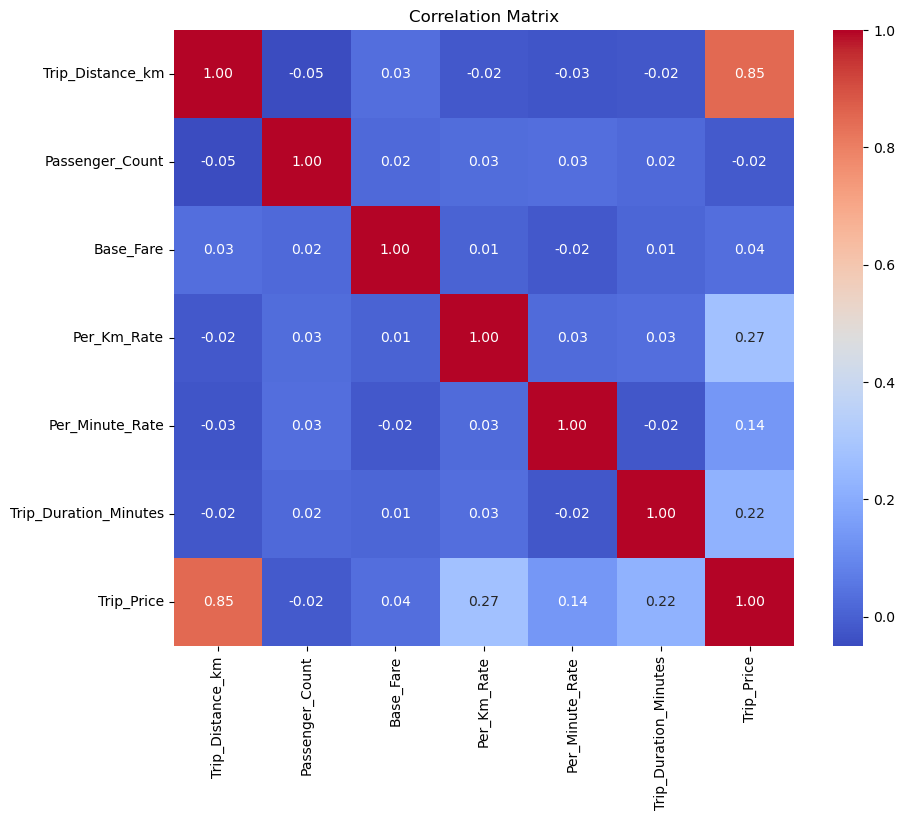

In [83]:
# plot correlatin matrix
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = numeric_df.corr()

# show the matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


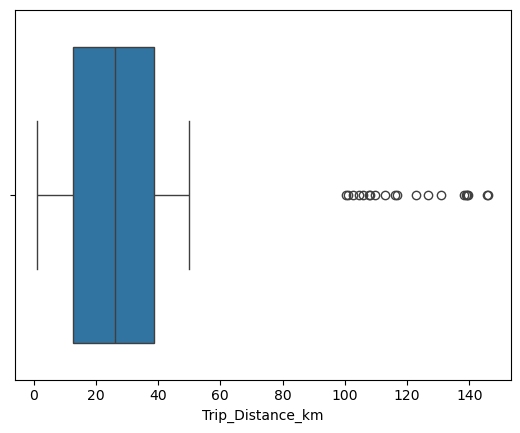

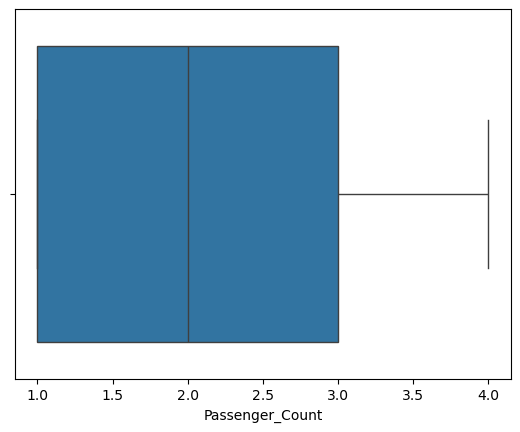

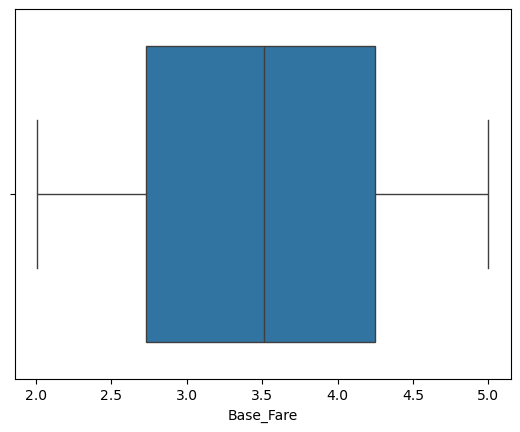

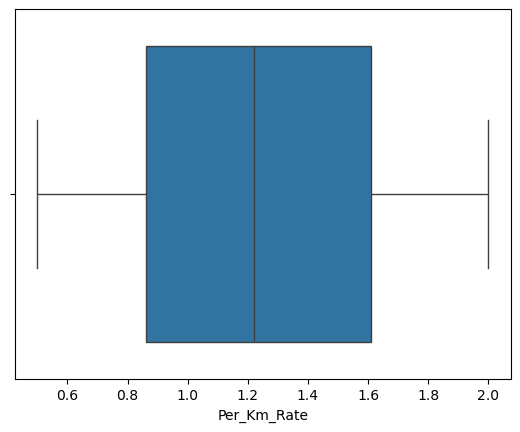

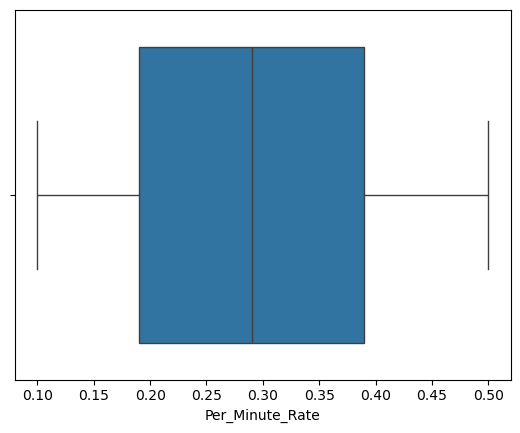

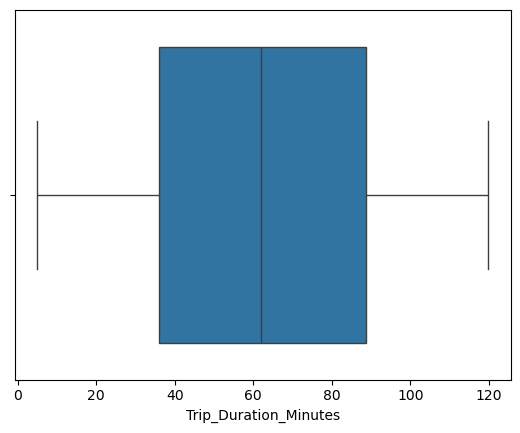

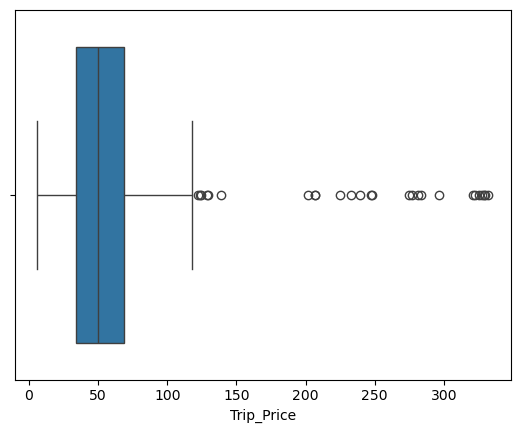

In [84]:
# For a numerical column like 'Price'
quantitative_columns = ['Trip_Distance_km', 'Passenger_Count','Base_Fare','Per_Km_Rate','Per_Minute_Rate','Trip_Duration_Minutes','Trip_Price']

for column in quantitative_columns:
    sns.boxplot(x=df_taxi[column])
    plt.show()


In [85]:
# Check skewness for the relevant variables
skew_distance = df_taxi['Trip_Distance_km'].skew()
skew_price = df_taxi['Trip_Price'].skew()
skew_duration = df_taxi['Trip_Duration_Minutes'].skew()#we check also this variable because it has high variance

print(f"Skewness of 'Trip_Distance_km': {skew_distance}")
print(f"Skewness of 'Trip_Price': {skew_price}")
print(f"Skewness of 'Trip_Duration_Minutes': {skew_duration}")

#if the skewness is higher than 1, then we should apply log_transformation

Skewness of 'Trip_Distance_km': 2.232845430397109
Skewness of 'Trip_Price': 3.7319830187769125
Skewness of 'Trip_Duration_Minutes': 0.018308926471987792


In [86]:
import numpy as np

#applying log_transformation
df_taxi['Trip_Distance_km_log'] = np.log1p(df_taxi['Trip_Distance_km'])
df_taxi['Trip_Price_log'] = np.log1p(df_taxi['Trip_Price'])

#checking variance again
#df_taxi.var()
numeric_df.var()




Trip_Distance_km          398.788423
Passenger_Count             1.216373
Base_Fare                   0.756473
Per_Km_Rate                 0.184447
Per_Minute_Rate             0.013399
Trip_Duration_Minutes    1034.207336
Trip_Price               1647.948853
dtype: float64

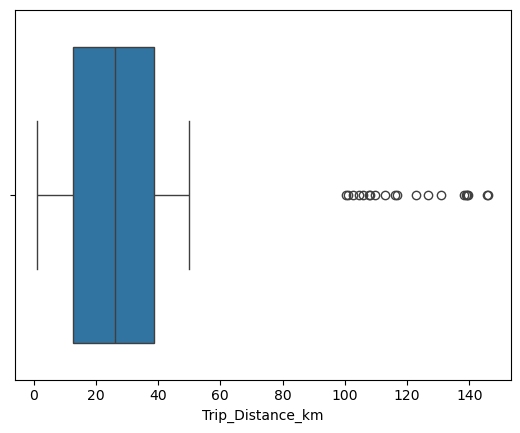

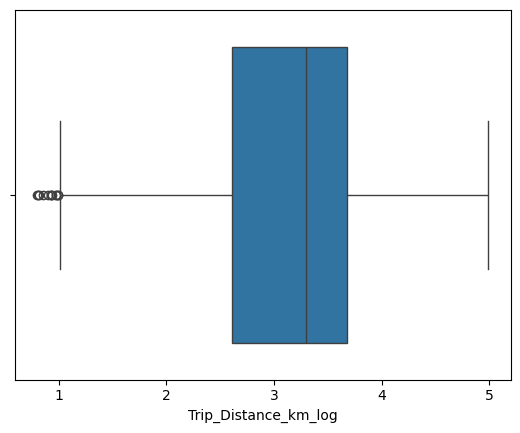

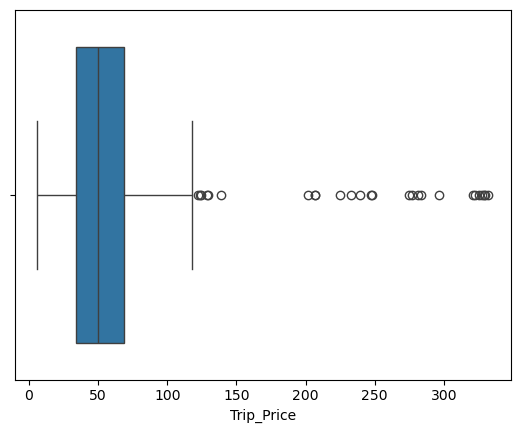

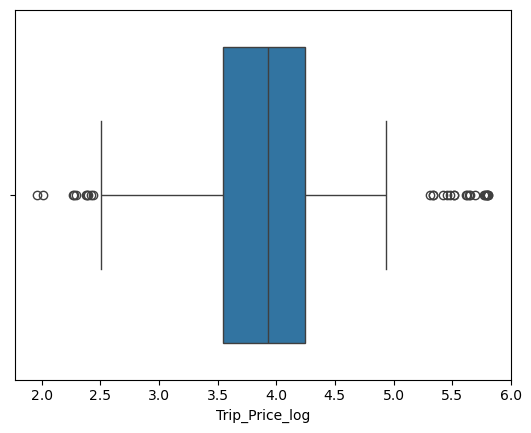

In [87]:
## CHECKING BOX PLOTS AGAIN
# For a numerical column like 'Price'
quantitative_columns = ['Trip_Distance_km', 'Trip_Distance_km_log', 'Trip_Price', 'Trip_Price_log']

for column in quantitative_columns:
    sns.boxplot(x=df_taxi[column])
    plt.show()

## Small analysis of categorical variable distribution

In [88]:
categorical_columns = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

for i in categorical_columns:
    print(f'Values for {i} are: {df_taxi[i].dropna().unique()}')


Values for Time_of_Day are: ['Morning' 'Afternoon' 'Evening' 'Night']
Values for Day_of_Week are: ['Weekday' 'Weekend']
Values for Traffic_Conditions are: ['Low' 'High' 'Medium']
Values for Weather are: ['Clear' 'Rain' 'Snow']


In [89]:
for i in categorical_columns:
    print(f''' Value occurrencies for {i}: 
          {df_taxi[i].value_counts(dropna=False)}''')

 Value occurrencies for Time_of_Day: 
          Time_of_Day
Afternoon    367
Morning      277
Evening      200
Night         93
NaN           49
Name: count, dtype: int64
 Value occurrencies for Day_of_Week: 
          Day_of_Week
Weekday    650
Weekend    293
NaN         43
Name: count, dtype: int64
 Value occurrencies for Traffic_Conditions: 
          Traffic_Conditions
Low       390
Medium    367
High      182
NaN        47
Name: count, dtype: int64
 Value occurrencies for Weather: 
          Weather
Clear    659
Rain     225
Snow      56
NaN       46
Name: count, dtype: int64


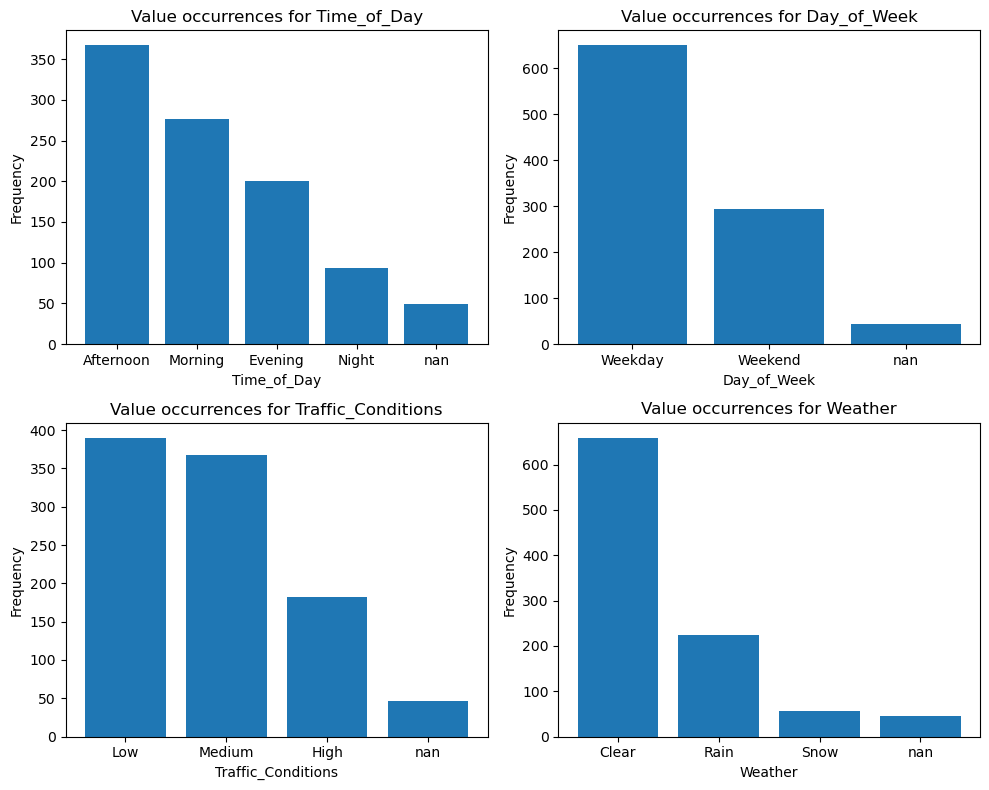

In [90]:
#Plot histograms for better visualization

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # to show all graphs together
axes = axes.flatten()

for i,column in enumerate (categorical_columns):
    value_counts= df_taxi[column].value_counts(dropna = False)

    value_counts.index= value_counts.index.astype(str)

    axes[i].bar(value_counts.index, value_counts.values)
    axes[i].set_title(f'Value occurrences for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()

plt.show()



### FILLING NAs FOR QUANTITATIVE VARIABLES

* filling 'Base_Fare' with the mean because it is **numerical** and **continous**
* filling 'Passengers_Count' with the mode because it is **numerical** and **discrete**
* filling 'Per_Minute_Rate' with the ratio between 'Trip_Price' / 'Trip_Duration_Minutes'
* filling 'Per_Km_Rate' with the ratio between 'Trip_Price'/ 'Trip_Distance_km'
* filling 'Trip_Duration_Minutes' with the ratio betwen 'Trip_Price'/ 'Per_Minute_Rate'
* filling 'Trip_Distance_km' with the ratio between 'Trip_Price'/'Per_Km_Rate'
* filling 'Trip_Price_km' with 2 possible products: 
1) 'Trip_Distance_km' * 'Per_Km_Rate'
2) 'Trip_Duration_Minutes' * 'Per_Minute_Rate'


In [91]:
# Compute the mean and store it as a variable
base_fare_mean = df_taxi['Base_Fare'].mean()
# fill the NaN in Base fare using that value
df_taxi['Base_Fare'].fillna(base_fare_mean, inplace=True)


#compute the mode of 'Passengers' and store it as a variable
passengers_mode =df_taxi['Passenger_Count'].mode()[0]
df_taxi['Passenger_Count'].fillna(passengers_mode, inplace= True )


#df_taxi['Base_Fare'] = df_taxi['Base_Fare'].fillna(base_fare_mean)
#df_taxi['Passenger_Count'] = df_taxi['Passenger_Count'].fillna(passengers_mode)

/var/folders/ls/mj9skg6x7j38ls1ncwhc9s400000gn/T/ipykernel_17865/959261483.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_taxi['Base_Fare'].fillna(base_fare_mean, inplace=True)
/var/folders/ls/mj9skg6x7j38ls1ncwhc9s400000gn/T/ipykernel_17865/959261483.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [92]:
#check 

print(df_taxi.isna().sum())
print(df_taxi.describe())

Trip_Distance_km         47
Time_of_Day              49
Day_of_Week              43
Passenger_Count           0
Traffic_Conditions       47
Weather                  46
Base_Fare                 0
Per_Km_Rate              47
Per_Minute_Rate          47
Trip_Duration_Minutes    45
Trip_Price               44
Trip_Distance_km_log     47
Trip_Price_log           44
dtype: int64
       Trip_Distance_km  Passenger_Count   Base_Fare  Per_Km_Rate  \
count        939.000000       986.000000  986.000000   939.000000   
mean          27.135015         2.492901    3.500522     1.234888   
std           19.969688         1.083541    0.848298     0.429473   
min            1.230000         1.000000    2.010000     0.500000   
25%           12.635000         2.000000    2.770000     0.860000   
50%           26.030000         3.000000    3.500522     1.220000   
75%           38.695000         3.000000    4.200000     1.610000   
max          146.067047         4.000000    5.000000     2.000000   

 

In [93]:
# Filling missing rates (Per_Minute_Rate)
df_taxi['Per_Minute_Rate'] = df_taxi['Per_Minute_Rate'].fillna(
    df_taxi.apply(lambda row: (row['Trip_Price'] / row['Passenger_Count']) / row['Trip_Duration_Minutes'] 
                  if pd.notnull(row['Trip_Price']) and pd.notnull (row['Passenger_Count']) and pd.notnull(row['Trip_Duration_Minutes']) 
                  else row['Per_Minute_Rate'], axis=1))


# Filling missing rates (Per_Km_Rate)

df_taxi['Per_Km_Rate'] = df_taxi['Per_Km_Rate'].fillna(
    df_taxi.apply(lambda row: (row['Trip_Price'] / row['Passenger_Count'])/row ['Trip_Distance_km']
                  if pd.notnull(row['Trip_Price']) and pd.notnull (row['Passenger_Count']) and pd.notnull(row['Trip_Distance_km'])
                  else row['Per_Km_Rate'], axis =1))



In [94]:
df_taxi.isna().sum()

Trip_Distance_km         47
Time_of_Day              49
Day_of_Week              43
Passenger_Count           0
Traffic_Conditions       47
Weather                  46
Base_Fare                 0
Per_Km_Rate               5
Per_Minute_Rate           2
Trip_Duration_Minutes    45
Trip_Price               44
Trip_Distance_km_log     47
Trip_Price_log           44
dtype: int64

In [95]:
# Filling missing rates (Trip_Duration_Minutes)
df_taxi['Trip_Duration_Minutes'] = df_taxi['Trip_Duration_Minutes'].fillna(
    df_taxi.apply(lambda row: (row['Trip_Price'] / row['Passenger_Count']) / row['Per_Minute_Rate'] 
                  if pd.notnull(row['Trip_Price']) and pd.notnull (row['Passenger_Count']) and pd.notnull(row['Per_Minute_Rate']) 
                  else row['Trip_Duration_Minutes'], axis=1))


# Filling missing rates (Trip_Distance_km)
df_taxi['Trip_Distance_km'] = df_taxi['Trip_Distance_km'].fillna(
    df_taxi.apply(lambda row: (row['Trip_Price'] / row['Passenger_Count'])/row ['Per_Km_Rate']
                  if pd.notnull(row['Trip_Price']) and pd.notnull (row['Passenger_Count']) and pd.notnull(row['Per_Km_Rate'])
                  else row['Trip_Distance_km'], axis =1))





In [96]:
df_taxi.isna().sum()

Trip_Distance_km          1
Time_of_Day              49
Day_of_Week              43
Passenger_Count           0
Traffic_Conditions       47
Weather                  46
Base_Fare                 0
Per_Km_Rate               5
Per_Minute_Rate           2
Trip_Duration_Minutes     4
Trip_Price               44
Trip_Distance_km_log     47
Trip_Price_log           44
dtype: int64

In [97]:
# Filling missing rates (Trip_Price) with Distance
df_taxi['Trip_Price'] = df_taxi['Trip_Price'].fillna(
    df_taxi.apply(lambda row: (row['Trip_Distance_km']*row ['Per_Km_Rate'])* row['Passenger_Count']
                  if pd.notnull(row['Trip_Distance_km']) and pd.notnull (row['Passenger_Count']) and pd.notnull(row['Per_Km_Rate'])
                  else row['Trip_Price'], axis =1))


# Filling missing rates (Trip_Price) with Minutes
df_taxi['Trip_Price'] = df_taxi['Trip_Price'].fillna(
    df_taxi.apply(lambda row: (row['Trip_Duration_Minutes']*row ['Per_Minute_Rate']) * row['Passenger_Count']
                  if pd.notnull(row['Trip_Duration_Minutes']) and pd.notnull (row['Passenger_Count']) and pd.notnull(row['Per_Minute_Rate'])
                  else row['Trip_Price'], axis =1))

In [98]:
df_taxi.isna().sum()

Trip_Distance_km          1
Time_of_Day              49
Day_of_Week              43
Passenger_Count           0
Traffic_Conditions       47
Weather                  46
Base_Fare                 0
Per_Km_Rate               5
Per_Minute_Rate           2
Trip_Duration_Minutes     4
Trip_Price                0
Trip_Distance_km_log     47
Trip_Price_log           44
dtype: int64

In [99]:
# now that we have the Trip_Price, we try again filling all the remaining numerical Nas

# Filling missing rates (Trip_Duration_Minutes)
df_taxi['Trip_Duration_Minutes'] = df_taxi['Trip_Duration_Minutes'].fillna(
    df_taxi.apply(lambda row: (row['Trip_Price'] / row['Passenger_Count']) / row['Per_Minute_Rate'] 
                  if pd.notnull(row['Trip_Price']) and pd.notnull (row['Passenger_Count']) and pd.notnull(row['Per_Minute_Rate']) 
                  else row['Trip_Duration_Minutes'], axis=1))


# Filling missing rates (Trip_Distance_km)
df_taxi['Trip_Distance_km'] = df_taxi['Trip_Distance_km'].fillna(
    df_taxi.apply(lambda row: (row['Trip_Price'] / row['Passenger_Count'])/row ['Per_Km_Rate']
                  if pd.notnull(row['Trip_Price']) and pd.notnull (row['Passenger_Count']) and pd.notnull(row['Per_Km_Rate'])
                  else row['Trip_Distance_km'], axis =1))



In [100]:
# Filling missing rates (Per_Minute_Rate)
df_taxi['Per_Minute_Rate'] = df_taxi['Per_Minute_Rate'].fillna(
    df_taxi.apply(lambda row: (row['Trip_Price'] / row['Passenger_Count']) / row['Trip_Duration_Minutes'] 
                  if pd.notnull(row['Trip_Price']) and pd.notnull (row['Passenger_Count']) and pd.notnull(row['Trip_Duration_Minutes']) 
                  else row['Per_Minute_Rate'], axis=1))


# Filling missing rates (Per_Km_Rate)

df_taxi['Per_Km_Rate'] = df_taxi['Per_Km_Rate'].fillna(
    df_taxi.apply(lambda row: (row['Trip_Price'] / row['Passenger_Count'])/row ['Trip_Distance_km']
                  if pd.notnull(row['Trip_Price']) and pd.notnull (row['Passenger_Count']) and pd.notnull(row['Trip_Distance_km'])
                  else row['Per_Km_Rate'], axis =1))

In [101]:
#applying AGAIN log_transformation
df_taxi['Trip_Distance_km_log'] = np.log1p(df_taxi['Trip_Distance_km'])
df_taxi['Trip_Price_log'] = np.log1p(df_taxi['Trip_Price'])

#checking variance again
numeric_df.var()


Trip_Distance_km          398.788423
Passenger_Count             1.216373
Base_Fare                   0.756473
Per_Km_Rate                 0.184447
Per_Minute_Rate             0.013399
Trip_Duration_Minutes    1034.207336
Trip_Price               1647.948853
dtype: float64

In [102]:
df_taxi.isna().sum() #best we could do for QUANTITATIVE VARIABLES

Trip_Distance_km          1
Time_of_Day              49
Day_of_Week              43
Passenger_Count           0
Traffic_Conditions       47
Weather                  46
Base_Fare                 0
Per_Km_Rate               1
Per_Minute_Rate           2
Trip_Duration_Minutes     2
Trip_Price                0
Trip_Distance_km_log      1
Trip_Price_log            0
dtype: int64

In [103]:
# Count NaN for each row
na_counts = df_taxi.isna().sum(axis=1)

# Count the distirbution of rows with specific values of NaN
distribution = na_counts.value_counts().sort_index()

# show
print(distribution)

0    806
1    169
2     10
3      1
Name: count, dtype: int64


In [104]:
# Remove Columns with NaN in numerical variables
numerical_columns = df_taxi.select_dtypes(include=['float64', 'int64']).columns

# Remove NAs with NaN in numerical variables
df_taxi = df_taxi.dropna(subset=numerical_columns)

# Verify
print(df_taxi.isnull().sum())


Trip_Distance_km          0
Time_of_Day              49
Day_of_Week              43
Passenger_Count           0
Traffic_Conditions       47
Weather                  46
Base_Fare                 0
Per_Km_Rate               0
Per_Minute_Rate           0
Trip_Duration_Minutes     0
Trip_Price                0
Trip_Distance_km_log      0
Trip_Price_log            0
dtype: int64


### FILLING NAs for CATEGORICAL VARIABLES

In [105]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       983 non-null    float64
 1   Time_of_Day            934 non-null    object 
 2   Day_of_Week            940 non-null    object 
 3   Passenger_Count        983 non-null    float64
 4   Traffic_Conditions     936 non-null    object 
 5   Weather                937 non-null    object 
 6   Base_Fare              983 non-null    float64
 7   Per_Km_Rate            983 non-null    float64
 8   Per_Minute_Rate        983 non-null    float64
 9   Trip_Duration_Minutes  983 non-null    float64
 10  Trip_Price             983 non-null    float64
 11  Trip_Distance_km_log   983 non-null    float64
 12  Trip_Price_log         983 non-null    float64
dtypes: float64(9), object(4)
memory usage: 107.5+ KB


In [106]:
# To verify our assumption that NaN are random, we can analyse the correlation between NaN in different columns
# We heck whether the presence of NaN in one column correlates with the presence of NaN in other columns. 
# # This will help you identify any patterns in the rows.

# create a boolean matrix to see where there are NaN
nan_matrix = df_taxi.isna()

# compute the correlation between columns with NaN
nan_correlation = nan_matrix.corr()
print(nan_correlation)


                       Trip_Distance_km  Time_of_Day  Day_of_Week  \
Trip_Distance_km                    NaN          NaN          NaN   
Time_of_Day                         NaN     1.000000    -0.048989   
Day_of_Week                         NaN    -0.048989     1.000000   
Passenger_Count                     NaN          NaN          NaN   
Traffic_Conditions                  NaN    -0.029418    -0.047927   
Weather                             NaN    -0.050750     0.070365   
Base_Fare                           NaN          NaN          NaN   
Per_Km_Rate                         NaN          NaN          NaN   
Per_Minute_Rate                     NaN          NaN          NaN   
Trip_Duration_Minutes               NaN          NaN          NaN   
Trip_Price                          NaN          NaN          NaN   
Trip_Distance_km_log                NaN          NaN          NaN   
Trip_Price_log                      NaN          NaN          NaN   

                       Passenger_

Ti fill missing values we will use the **Mode** because NaN are distributed randomly

In [107]:
categorical_columns = df_taxi.select_dtypes(include=['object']).columns

# Fill NaN with the mode
for col in categorical_columns:
    most_frequent = df_taxi[col].mode()[0]  
    df_taxi[col].fillna(most_frequent, inplace=True)  

# show the result
print(df_taxi.head())


   Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
0         19.350000     Morning     Weekday              3.0   
1         47.590000   Afternoon     Weekday              1.0   
2         36.870000     Evening     Weekend              1.0   
3         30.330000     Evening     Weekday              4.0   
4          8.263492     Evening     Weekday              3.0   

  Traffic_Conditions Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0                Low   Clear   3.560000         0.80             0.32   
1               High   Clear   3.500522         0.62             0.43   
2               High   Clear   2.700000         1.21             0.15   
3                Low   Clear   3.480000         0.51             0.15   
4               High   Clear   2.930000         0.63             0.32   

   Trip_Duration_Minutes  Trip_Price  Trip_Distance_km_log  Trip_Price_log  
0                  53.82     36.2624              3.013081        3.617985  
1                  40.

/var/folders/ls/mj9skg6x7j38ls1ncwhc9s400000gn/T/ipykernel_17865/3827565119.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_taxi[col].fillna(most_frequent, inplace=True)


In [108]:
# Count NaN for each row
na_counts = df_taxi.isna().sum(axis=1)

# Count the distirbution of rows with specific values of NaN
distribution = na_counts.value_counts().sort_index()

# show
print(distribution)

0    983
Name: count, dtype: int64


In [109]:
df_taxi.to_csv('df_taxi_cleaned')